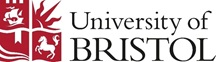

#**EFIMM0142: Modelling Analytics**



##  ***Week 8: Transshipment and Assignment Problems (Computer Lab Session)***

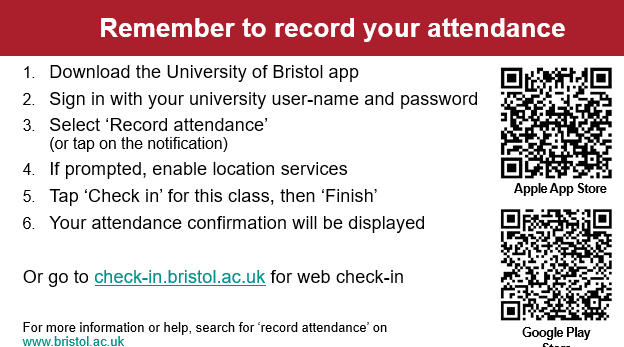


# <font color="blue">**Example 1**</font> -- transshipment problem

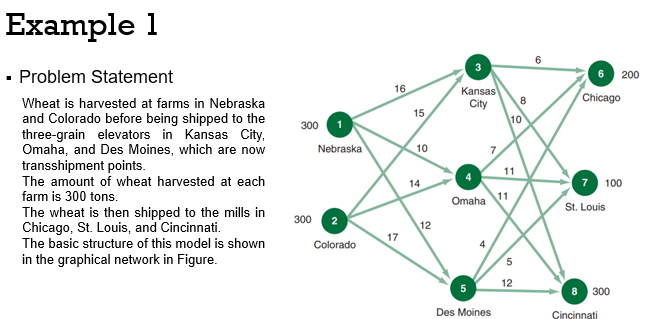



<font color="blue">***Model:***</font>

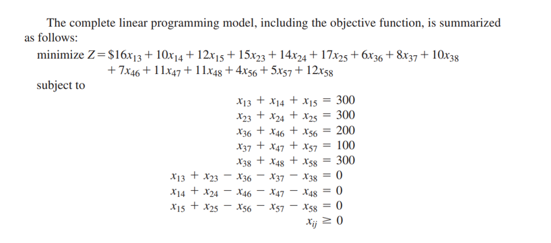

**Method 1 (Basic)**

In [ ]:
# Example 1
# Solving Transshipment Problem with

# install pulp library
!pip install pulp

# import pulp library
from pulp import *

"""
   Model:
   minimize Z = 16x13 + 10x14 + 12x15 + 15x23 + 14x24 + 17x25 + 6x36 + 8x37 + 10x38
                      + 7x46 + 11x47 + 11x48 + 4x56 + 5x57 + 12x58
    subject to
                                                       x13 + x14 + x15 = 300
                                                       x23 + x24 + x25 = 300
                                                       x36 + x46 + x56 = 200
                                                       x37 + x47 + x57 = 100
                                                       x38 + x48 + x58 = 300
                                            x13 + x23 - x36 - x37 - x38 = 0
                                            x14 + x24 - x46 - x47 - x48 = 0
                                            x15 + x25 - x56 - x57 - x58 = 0
                                                                   xij >= 0
"""

# Define decision variables representing the quantity transported on each route
x13 = LpVariable('x13', lowBound=0)  # Route from node 1 to node 3
x14 = LpVariable('x14', lowBound=0)  # Route from node 1 to node 4
x15 = LpVariable('x15', lowBound=0)  # Route from node 1 to node 5
x23 = LpVariable('x23', lowBound=0)  # Route from node 2 to node 3
x24 = LpVariable('x24', lowBound=0)  # Route from node 2 to node 4
x25 = LpVariable('x25', lowBound=0)  # Route from node 2 to node 5
x36 = LpVariable('x36', lowBound=0)  # Route from node 3 to node 6
x37 = LpVariable('x37', lowBound=0)  # Route from node 3 to node 7
x38 = LpVariable('x38', lowBound=0)  # Route from node 3 to node 8
x46 = LpVariable('x46', lowBound=0)  # Route from node 4 to node 6
x47 = LpVariable('x47', lowBound=0)  # Route from node 4 to node 7
x48 = LpVariable('x48', lowBound=0)  # Route from node 4 to node 8
x56 = LpVariable('x56', lowBound=0)  # Route from node 5 to node 6
x57 = LpVariable('x57', lowBound=0)  # Route from node 5 to node 7
x58 = LpVariable('x58', lowBound=0)  # Route from node 5 to node 8

# Initialize the model as a minimization problem
TSP_Example1 = LpProblem("Example_1_Transshipment", LpMinimize)

# Define the objective function to minimize the total transportation cost
# Each term represents the cost for transporting goods along a specific route
TSP_Example1 += (16*x13 + 10*x14 + 12*x15 + 15*x23 + 14*x24 + 17*x25 +
                 6*x36 + 8*x37 + 10*x38 + 7*x46 + 11*x47 + 11*x48 +
                 4*x56 + 5*x57 + 12*x58), "Total_Transportation_Cost"

# Add supply constraints at the source nodes
# These constraints ensure that the total quantity shipped from each source meets the supply
TSP_Example1 += (x13 + x14 + x15 == 300), "Supply_Constraint_Node_1"
TSP_Example1 += (x23 + x24 + x25 == 300), "Supply_Constraint_Node_2"

# Add demand constraints at the destination nodes
# These constraints ensure that the total quantity received at each destination matches the demand
TSP_Example1 += (x36 + x46 + x56 == 200), "Demand_Constraint_Node_6"
TSP_Example1 += (x37 + x47 + x57 == 100), "Demand_Constraint_Node_7"
TSP_Example1 += (x38 + x48 + x58 == 300), "Demand_Constraint_Node_8"

# Add flow balance constraints at the transshipment nodes
# These constraints ensure that the amount entering a transshipment node equals the amount exiting
TSP_Example1 += (x13 + x23 - x36 - x37 - x38 == 0), "Flow_Balance_Node_3"
TSP_Example1 += (x14 + x24 - x46 - x47 - x48 == 0), "Flow_Balance_Node_4"
TSP_Example1 += (x15 + x25 - x56 - x57 - x58 == 0), "Flow_Balance_Node_5"

# Solve the problem using PuLP's solver
TSP_Example1.solve()

# Print the solution: optimal transportation quantities for each route
print(TSP_Example1.name)
for v in TSP_Example1.variables():
    print(f"{v.name} = {v.varValue}")

# Print the total minimized transportation cost
print("Value of Objective Function =", value(TSP_Example1.objective))


**Method 2 (General)**



In [ ]:
from pulp import *

# Define supply nodes (farms) and their supply quantities
farms = ['F1', 'F2']
supply = {"F1": 300, "F2": 300}

# Define demand nodes (mills) and their demand quantities
mills = ['M1', 'M2', 'M3']
demand = {"M1": 200, "M2": 100, "M3": 300}

# Define transshipment nodes (grain elevators)
grain_elevators = ['GE1', 'GE2', 'GE3']

# Define transportation costs from farms to grain elevators and from grain elevators to mills
# The costs are structured as two matrices for each part of the route: farms to grain elevators and grain elevators to mills
c1 = [[16, 10, 12],   # Costs from F1 to each grain elevator
      [15, 14, 17]]   # Costs from F2 to each grain elevator
c2 = [[6, 8, 10],     # Costs from GE1 to each mill
      [7, 11, 11],    # Costs from GE2 to each mill
      [4, 5, 12]]     # Costs from GE3 to each mill

# Convert cost matrices to dictionaries for easy reference
costs_1 = makeDict([farms, grain_elevators], c1)
costs_2 = makeDict([grain_elevators, mills], c2)

# Initialize the transshipment problem as a minimization problem
prob = LpProblem("Transshipment_Problem", LpMinimize)

# Define decision variables for each route from farms to grain elevators
vars = LpVariable.dicts("Route", (farms, grain_elevators), lowBound=0, cat=LpInteger)

# Define decision variables for each route from grain elevators to mills
vars_2 = LpVariable.dicts("Route", (grain_elevators, mills), lowBound=0, cat=LpInteger)

# Define the objective function to minimize total transportation cost
# The objective function sums the costs for transporting goods from farms to grain elevators and from grain elevators to mills
prob += (
    lpSum([vars[f][ge] * costs_1[f][ge] for f in farms for ge in grain_elevators]) +
    lpSum([vars_2[ge][m] * costs_2[ge][m] for ge in grain_elevators for m in mills])
), "Total_Transportation_Cost"

# Add supply constraints to ensure each farm ships exactly its supply quantity
for f in farms:
    prob += (
        lpSum(vars[f][ge] for ge in grain_elevators) == supply[f]
    ), f"Supply_Constraint_{f}"

# Add demand constraints to ensure each mill receives exactly its demand quantity
for m in mills:
    prob += (
        lpSum(vars_2[ge][m] for ge in grain_elevators) == demand[m]
    ), f"Demand_Constraint_{m}"

# Add transshipment constraints to ensure flow balance at each grain elevator
# The amount entering each grain elevator must equal the amount exiting it
for ge in grain_elevators:
    prob += (
        lpSum(vars[f][ge] for f in farms) == lpSum(vars_2[ge][m] for m in mills)
    ), f"Transshipment_Constraint_{ge}"

# Solve the problem using the default solver in PuLP
prob.solve()

# Output the optimized transportation plan for each route
print("Optimal Transportation Plan:")
for v in prob.variables():
    print(f"{v.name} = {v.varValue}")

# Output the minimized total transportation cost
print("Value of Objective Function =", value(prob.objective))


# <font color="blue">**Exercise  1**</font>
**Unacceptable routes**

If the route between ‘5. Des Moines’ and ‘6. Chicago’ cannot be used. Then, try
to use Python to solve this problem.

In [ ]:
# Coding here

In [ ]:
# Install PuLP library
!pip install pulp

# Import PuLP library for linear programming and optimization
from pulp import *

# Define supply nodes (farms) and their supply quantities
farms = ['F1', 'F2']
supply = {"F1": 300, "F2": 300}

# Define demand nodes (mills) and their demand quantities
mills = ['M1', 'M2', 'M3']
demand = {"M1": 200, "M2": 100, "M3": 300}

# Define transshipment nodes (grain elevators) where goods are temporarily stored
grain_elevators = ['GE1', 'GE2', 'GE3']

# Define transportation costs for each route:
# c1: From farms to grain elevators, c2: From grain elevators to mills
c1 = [[16, 10, 12],   # Costs from F1 to each grain elevator
      [15, 14, 17]]   # Costs from F2 to each grain elevator
c2 = [[6, 8, 10],     # Costs from GE1 to each mill
      [7, 11, 11],    # Costs from GE2 to each mill
      [1000, 5, 12]]  # Costs from GE3 to each mill, with high cost for infeasible routes

# Convert cost matrices to dictionaries for easy reference when defining the objective function
costs_1 = makeDict([farms, grain_elevators], c1, 0)
costs_2 = makeDict([grain_elevators, mills], c2, 0)

# Initialize the transshipment problem as a minimization problem
prob = LpProblem("Transshipment_Problem", LpMinimize)

# Create decision variables for routes from farms to grain elevators
# Variables are constrained to be non-negative integers, as quantities cannot be negative or fractional
vars = LpVariable.dicts("Route", (farms, grain_elevators), lowBound=0, cat=LpInteger)

# Create decision variables for routes from grain elevators to mills
vars_2 = LpVariable.dicts("Route", (grain_elevators, mills), lowBound=0, cat=LpInteger)

# Define the objective function to minimize total transportation cost
# Sum the costs for transporting goods from farms to grain elevators and from grain elevators to mills
prob += (
    lpSum(vars[f][ge] * costs_1[f][ge] for f in farms for ge in grain_elevators) +
    lpSum(vars_2[ge][m] * costs_2[ge][m] for ge in grain_elevators for m in mills)
), "Total_Transportation_Cost"

# Add supply constraints for each farm to ensure that the total shipped quantity matches its supply
for f in farms:
    prob += (
        lpSum(vars[f][ge] for ge in grain_elevators) == supply[f]
    ), f"Supply_Constraint_{f}"

# Add demand constraints for each mill to ensure that the total received quantity matches its demand
for m in mills:
    prob += (
        lpSum(vars_2[ge][m] for ge in grain_elevators) == demand[m]
    ), f"Demand_Constraint_{m}"

# Add transshipment constraints for each grain elevator
# Ensures that the quantity entering equals the quantity exiting, maintaining flow balance at transshipment nodes
for ge in grain_elevators:
    prob += (
        lpSum(vars[f][ge] for f in farms) == lpSum(vars_2[ge][m] for m in mills)
    ), f"Transshipment_Constraint_{ge}"

# Solve the problem using PuLP's default solver
prob.solve()

# Output the optimized transportation plan for each route
print("Optimal Transportation Plan:")
for v in prob.variables():
    print(f"{v.name} = {v.varValue}")

# Output the minimized total transportation cost
print("Value of Objective Function =", value(prob.objective))


# <font color="blue">**Example  2**</font> -- Assignment Problem

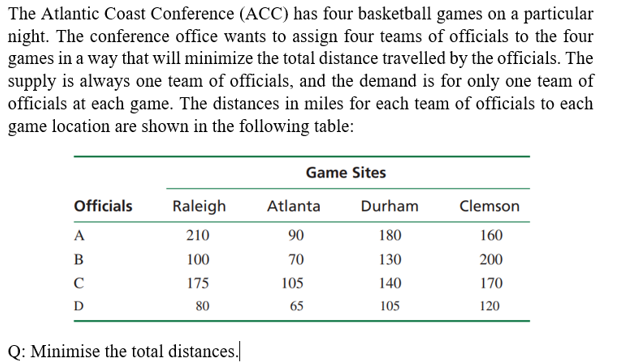

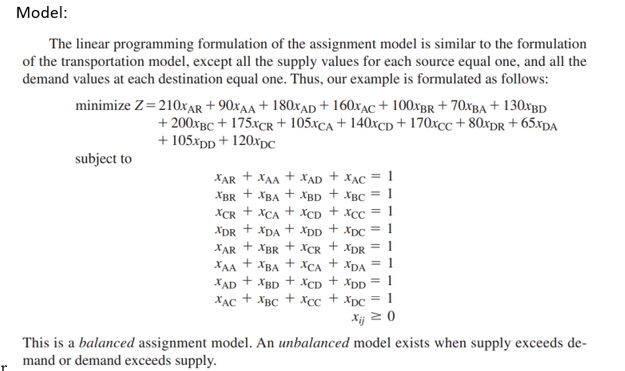

**Method 1**

In [ ]:
# Import the PuLP library, which is used for linear programming and optimization
from pulp import *

# Set parameters for the assignment problem

# Define the list of teams (supply nodes) and their availability
Teams = ["A", "B", "C", "D"]
supply = {"A": 1, "B": 1, "C": 1, "D": 1}  # Each team is available for exactly one assignment

# Define the list of sites (demand nodes) and their requirements
Sites = ["R", "A", "D", "C"]
demand = {"R": 1, "A": 1, "D": 1, "C": 1}  # Each site requires exactly one team

# Define the mileage matrix, representing the distance between each team and site
# The matrix is structured as rows (teams) and columns (sites) for easy conversion to a dictionary
Mileage = [[210, 90, 180, 160],  # Distances from Team A to each site
           [100, 70, 130, 200],  # Distances from Team B to each site
           [175, 105, 140, 170], # Distances from Team C to each site
           [80, 65, 105, 120]]   # Distances from Team D to each site

# Convert the mileage matrix into a dictionary for easier reference in the objective function
Mileages = makeDict([Teams, Sites], Mileage, 0)

# Initialize the assignment problem as a minimization problem
# The objective is to minimize the total mileage covered by all teams
prob = LpProblem("Assignment_Problem", LpMinimize)

# Create decision variables for each assignment of teams to sites
# These variables indicate whether a team is assigned to a site (binary integer: 0 or 1)
vars = LpVariable.dicts("Assign", (Teams, Sites), lowBound=0, upBound=1, cat=LpInteger)

# Define the objective function to minimize the total mileage for all assignments
# The function sums the product of each assignment variable and the corresponding mileage
prob += lpSum([vars[t][s] * Mileages[t][s] for t in Teams for s in Sites]), "Total_Mileage"

# Add constraints to ensure each team is assigned to exactly one site (supply constraints)
for t in Teams:
    prob += lpSum([vars[t][s] for s in Sites]) == supply[t], f"Team_Assignment_{t}"

# Add constraints to ensure each site is assigned exactly one team (demand constraints)
for s in Sites:
    prob += lpSum([vars[t][s] for t in Teams]) == demand[s], f"Site_Requirement_{s}"

# Solve the problem using PuLP's default solver
prob.solve()

# Output the optimized assignments and their values
print("Optimal Assignment Plan:")
for v in prob.variables():
    print(v.name, "=", v.varValue)  # Output whether each team is assigned to each site

# Output the total minimized mileage from the objective function
print("Value of Objective Function =", value(prob.objective))


In the lecture session, we already discovered that this assignment problem does not have a unique solution—there are multiple ways to achieve the optimal result. However, PuLP does not have a built-in method to automatically check if an optimal solution is unique. If we want to obtain all possible optimal solutions, we need to modify the code to iterate and find each one.

In [ ]:
# Import PuLP library for linear programming
from pulp import *

# Define the problem parameters
Teams = ["A", "B", "C", "D"]
supply = {"A": 1, "B": 1, "C": 1, "D": 1}
Sites = ["R", "A", "D", "C"]
demand = {"R": 1, "A": 1, "D": 1, "C": 1}
Mileage = [[210, 90, 180, 160], [100, 70, 130, 200], [175, 105, 140, 170], [80, 65, 105, 120]]
Mileages = makeDict([Teams, Sites], Mileage, 0)

# Initialize the problem as a minimization problem
prob = LpProblem("Assignment_Problem", LpMinimize)

# Create binary decision variables
vars = LpVariable.dicts("Assign", (Teams, Sites), lowBound=0, upBound=1, cat=LpInteger)

# Define the objective function
prob += lpSum([vars[t][s] * Mileages[t][s] for t in Teams for s in Sites]), "Total_Mileage"

# Add supply constraints (each team is assigned to exactly one site)
for t in Teams:
    prob += lpSum([vars[t][s] for s in Sites]) == supply[t], f"Team_Assignment_{t}"

# Add demand constraints (each site is assigned exactly one team)
for s in Sites:
    prob += lpSum([vars[t][s] for t in Teams]) == demand[s], f"Site_Requirement_{s}"

# Initialize storage for solutions
'''
solutions: An empty list to store all the optimal solutions that will be found.
optimal_value: This will store the optimal value of the objective function once it is determined. Initially, it’s set to None.
'''
solutions = []
optimal_value = None

# Loop to find all optimal solutions -- This is an infinite while loop that continues until no further optimal solutions are found.
while True:
    # Solve the problem
    prob.solve()

    # Check if the solution is optimal
    # This checks the status of the problem after solving. If the problem does not have an optimal solution (i.e., it is not feasible or no further solutions are possible), the loop breaks.
    if LpStatus[prob.status] != 'Optimal':
        break

    # Store the current solution
    '''
    current_solution: This dictionary comprehension stores the current assignment of teams (t) to sites (s) where the decision variable vars[t][s] is greater than 0 (which means the team was assigned to that site).
    current_solution_cost: This stores the total cost (or objective function value) of the current solution.
    '''
    current_solution = {(t, s): vars[t][s].varValue for t in Teams for s in Sites if vars[t][s].varValue > 0}
    current_solution_cost = value(prob.objective)

    # Check if the current solution is optimal (same cost as initial optimal solution)
    '''
    If this is the first solution, optimal_value is assigned the current solution’s cost.
    For subsequent solutions, it checks whether the current solution’s cost is different from the initial optimal_value.
    If it is different, the loop breaks because it's no longer finding the same optimal cost, meaning all optimal solutions have been found.
    '''
    if optimal_value is None:
        optimal_value = current_solution_cost
    elif current_solution_cost != optimal_value:
        break

    # Store the optimal solution
    solutions.append(current_solution)

    # Exclude the current solution by adding a new constraint
    # Exclude this exact set of assignments
    '''
    This constraint is added to the model to exclude the current solution in the next iteration.
    lpSum([vars[t][s] for (t, s) in current_solution]): This sums up all the variables involved in the current solution.
    Since all the values in current_solution are either 0 or 1, the sum of the selected assignments is exactly equal to the number of teams.
    <= len(Teams) - 1: This ensures that the next solution will be different by forcing the total sum of variables
    for the next solution to be strictly less than the number of teams (effectively excluding the current solution).
    '''
    prob += lpSum([vars[t][s] for (t, s) in current_solution]) <= len(Teams) - 1

# Output all optimal solutions
print(f"All Optimal Solutions with Total Mileage = {optimal_value}")
for i, solution in enumerate(solutions, 1):
    print(f"\nSolution {i}:")
    for (team, site), val in solution.items():
        print(f"Team {team} assigned to Site {site} (Value: {val})")


**Method 2:**

We’ve learned how to code a transportation problem, a transshipment problem, and an assignment problem. You might have noticed that we’re consistently using a similar process and structure for each of these problems.

So, can we create a more generalised function that could handle all of these types of problems?

This way, we would only need to configure the inputs and then call the appropriate function to get the result.

Now, let us build one assignemnt problem function.

In [ ]:
from pulp import *

def AssignmentP(s, d, c):
    """
    Solves an assignment problem using linear programming to minimize the total cost of assignments.

    Parameters:
    s (dict): Supply dictionary where keys are supply nodes and values are their available quantities.
    d (dict): Demand dictionary where keys are demand nodes and values are their required quantities.
    c (list of lists): Cost matrix for assignments, where each element represents the cost between supply and demand nodes.

    Returns:
    prob (LpProblem): The solved PuLP problem instance.
    """

    # Convert supply and demand dictionaries to lists of nodes
    SupplyN = list(s.keys())
    DemandN = list(d.keys())

    # Convert the cost matrix into a dictionary for easy referencing in the objective function
    Cost = makeDict([SupplyN, DemandN], c, 0)

    # Initialize the assignment problem as a minimization problem
    prob = LpProblem("Assignment_Problem", LpMinimize)

    # Create decision variables for each possible assignment
    # Variables are binary, where 1 indicates an assignment from a supply node to a demand node, and 0 otherwise
    vars = LpVariable.dicts("Assign", (SupplyN, DemandN), lowBound=0, upBound=1, cat=LpInteger)

    # Define the objective function to minimize the total cost of assignments
    # The function sums the product of each assignment variable and the corresponding cost
    prob += lpSum(vars[w][b] * Cost[w][b] for w in SupplyN for b in DemandN), "Total_Cost"

    # Add supply constraints to ensure each supply node is assigned exactly its quantity
    for w in SupplyN:
        prob += lpSum(vars[w][b] for b in DemandN) == s[w], f"Supply_Constraint_{w}"

    # Add demand constraints to ensure each demand node receives exactly its required quantity
    for b in DemandN:
        prob += lpSum(vars[w][b] for w in SupplyN) == d[b], f"Demand_Constraint_{b}"

    # Solve the problem using PuLP's default solver and return the solved problem instance
    prob.solve()
    return prob


If we have one assignment problem and want to call it.

In [ ]:
# Define the supply, demand, and mileage (cost) matrix
supply = {"A": 1, "B": 1, "C": 1, "D": 1}
demand = {"R": 1, "A": 1, "D": 1, "C": 1}
Mileage = [
    [210, 90, 180, 160],   # Distances from Team A to each site
    [100, 70, 130, 200],   # Distances from Team B to each site
    [175, 105, 140, 170],  # Distances from Team C to each site
    [80, 65, 105, 120]     # Distances from Team D to each site
]

# Call the AssignmentP function to solve the assignment problem
Result = AssignmentP(supply, demand, Mileage)

# Print the optimal assignments (variables' values)
print("Optimal Assignments:")
for v in Result.variables():
    print(f"{v.name} = {v.varValue}")

# Print the minimized total cost (objective function value)
print("Value of Objective Function =", value(Result.objective))


# <font color="blue">**Exercise  2**</font>
**Unbalanced problem**

If there are only 3 teams: A, B and C. Then, try to use Python to solve this
problem.

In [ ]:
# Code here

In [ ]:
# Define supply, demand, and mileage (cost) matrix for the assignment problem
supply = {"A": 1, "B": 1, "C": 1, "D": 1}
demand = {"R": 1, "A": 1, "D": 1, "C": 1}
Mileage = [
    [210, 90, 180, 160],   # Distances from Team A to each site
    [100, 70, 130, 200],   # Distances from Team B to each site
    [175, 105, 140, 170],  # Distances from Team C to each site
    [0, 0, 0, 0]           # Team D should not be assigned, hence cost set to 0 (or high cost could be used)
]

# Call the AssignmentP function to solve the assignment problem
Result = AssignmentP(supply, demand, Mileage)

# Print the optimal assignments and their values
print("Optimal Assignments:")
for v in Result.variables():
    print(f"{v.name} = {v.varValue}")

# Print the minimized total cost (objective function value)
print("Value of Objective Function =", value(Result.objective))
